In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import datasets

## Bagging Regressor

In [2]:
## Load data
tips = sns.load_dataset('tips')
X = np.array(tips.drop(columns = 'tip'))
y = np.array(tips['tip'])

## Train-test split
np.random.seed(1)
test_frac = 0.25
test_size = int(len(y)*test_frac)
test_idxs = np.random.choice(np.arange(len(y)), test_size, replace = False)
X_train = np.delete(X, test_idxs, 0)
y_train = np.delete(y, test_idxs, 0)
X_test = X[test_idxs]
y_test = y[test_idxs]

In [3]:
# import custom class
from MyEnsemble import Bagger

In [4]:
## Build model
bagger = Bagger()
bagger.fit(X_train, y_train, B = 30, max_depth = 20, min_size = 5, seed = 123)
# make predictions
y_test_hat = bagger.predict(X_test)

c:\Users\Kevin's PC\Documents\Python Projects\DS-from-Scratch\TreeEnsembleMethods\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


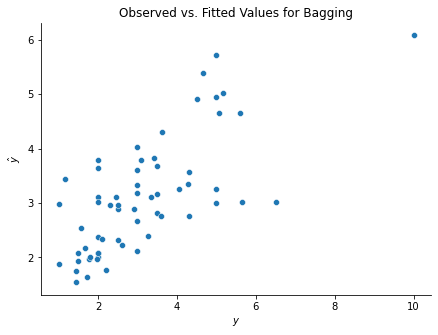

In [5]:
## Plot predicted values against actual
fig, ax = plt.subplots(figsize = (7, 5))
sns.scatterplot(y_test, y_test_hat)
ax.set(xlabel = r'$y$', ylabel = r'$\hat{y}$', title = r'Observed vs. Fitted Values for Bagging')
sns.despine()
plt.show()

## Random Forest Regressor

In [6]:
from MyEnsemble import RandomForest

In [7]:
## Load data
tips = sns.load_dataset('tips')
X = np.array(tips.drop(columns = 'tip'))
y = np.array(tips['tip'])

## Train-test split
np.random.seed(1)
test_frac = 0.25
test_size = int(len(y)*test_frac)
test_idxs = np.random.choice(np.arange(len(y)), test_size, replace = False)
X_train = np.delete(X, test_idxs, 0)
y_train = np.delete(y, test_idxs, 0)
X_test = X[test_idxs]
y_test = y[test_idxs]

In [8]:
## Build model
rf = RandomForest()
rf.fit(X_train, y_train, B = 30, C = 4, max_depth = 20, min_size = 5, seed = 123)
y_test_hat = rf.predict(X_test)

c:\Users\Kevin's PC\Documents\Python Projects\DS-from-Scratch\TreeEnsembleMethods\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


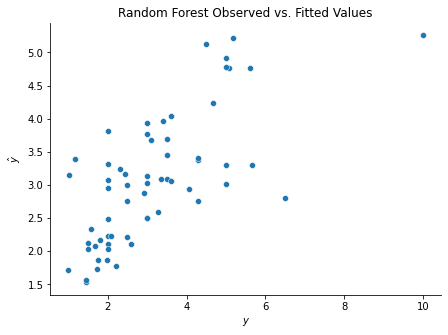

In [9]:
## Plot
fig, ax = plt.subplots(figsize = (7, 5))
sns.scatterplot(y_test, y_test_hat)
ax.set(xlabel = r'$y$', ylabel = r'$\hat{y}$', title = r'Random Forest Observed vs. Fitted Values')
sns.despine()
plt.show()

## AdaBoost

In [10]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

In [11]:
# import adaboost
from MyEnsemble import AdaBoost

In [12]:
## Load data
penguins = sns.load_dataset('penguins')
penguins.dropna(inplace = True)
X = np.array(penguins.drop(columns = ['species', 'island']))
y = 1*np.array(penguins['species'] == 'Adelie')
y[y == 0] = -1 # turn the results to binary, -1 or 1

## Train-test split
np.random.seed(123)
test_frac = 0.25
test_size = int(len(y)*test_frac)
test_idxs = np.random.choice(np.arange(len(y)), test_size, replace = False)
X_train = np.delete(X, test_idxs, 0)
y_train = np.delete(y, test_idxs, 0)
X_test = X[test_idxs]
y_test = y[test_idxs]

In [13]:
booster = AdaBoost()
booster.fit(X_train, y_train, T = 30, stub_depth = 3)
yhat = booster.predict(X_test)
# find accuracy
np.mean(yhat == y_test)

0.9759036144578314

## AdaBoostR2 (Regression)

In [14]:
# import model
from MyEnsemble import AdaBoostR2

In [15]:
## Load data
tips = sns.load_dataset('tips')
X = np.array(tips.drop(columns = 'tip'))
y = np.array(tips['tip'])

## Train-test split
np.random.seed(1)
test_frac = 0.25
test_size = int(len(y)*test_frac)
test_idxs = np.random.choice(np.arange(len(y)), test_size, replace = False)
X_train = np.delete(X, test_idxs, 0)
y_train = np.delete(y, test_idxs, 0)
X_test = X[test_idxs]
y_test = y[test_idxs]

In [16]:
# initialize model
booster = AdaBoostR2()
booster.fit(X_train, y_train, T = 50, stub_depth = 4, random_state = 123)

c:\Users\Kevin's PC\Documents\Python Projects\DS-from-Scratch\TreeEnsembleMethods\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


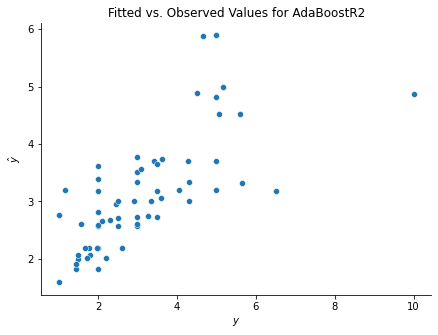

In [18]:
# plot results
fig, ax = plt.subplots(figsize = (7,5))
sns.scatterplot(y_test, booster.predict(X_test));
ax.set(xlabel = r'$y$', ylabel = r'$\hat{y}$', title = 'Fitted vs. Observed Values for AdaBoostR2')
sns.despine()
plt.show()